In [82]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [83]:
# definerer ligninger

def x_d(p):
    return 500-3.2*(p)

def x_s(p,t):
    return -100 + 4.3*(p-t)

In [84]:
# definerer symboler

x,p,t =sp.symbols('x p t', real=True, positive=True)

equ=sp.Eq(x_d(p), x_s(p,t))
equ


Eq(500 - 3.2*p, 4.3*p - 4.3*t - 100)

In [85]:
# likevektspris

lp = sp.solve(equ,p)
lp

[0.573333333333333*t + 80.0]

In [86]:
# likevekstkvantum

lp = 80

lk = x_d(lp)
lk

244.0

In [87]:
lk = 244
print(lp)
print(lk)

80
244


In [88]:
# likevektspris og likevektskvantum med avgift
equa=sp.Eq(x_d(p), x_s(p,4))

lp2 = sp.solve(equa,p)
lp2 = float(lp2[0])
print(lp2)

lk2= x_d(lp2)
lk2 = float(lk2)
lk2

82.29333333333334


236.6613333333333

In [89]:
# produsentoverskudd uten og med avgift
po=sp.integrate(x_s(p,0)-lp,(p,0,lk))
print(po)

poa=sp.integrate(x_s(p,4)-lp2,(p,0,lk2))
poa

84082.4000000000


73206.1031367111

In [90]:
# konsumentoverskudd uten og med avgift
ko=sp.integrate(x_d(p)-lk,(p,0,lp))
ko


10240.0000000000

Text(0.5, 1.0, 'Likevekt')

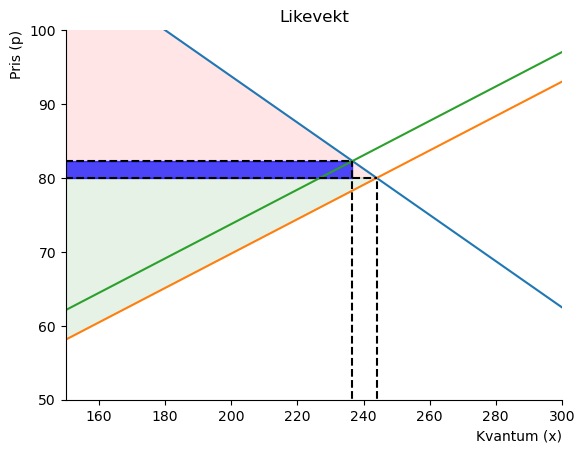

In [91]:
x_num=np.linspace(0,x_eq,100)

# lager axer
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(150,300))
                ax.set(ylim=(50,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax
            
fig, ax1 = create_ax()

# plotter funksjonene

ax1.plot(x_d(x_num),x_num, label='Etterspørsel')

ax1.plot(x_s(x_num, 0),x_num, label='Tilbud')

ax1.plot(x_s(x_num, 4),x_num, label='Tilbud, 4')

# setter inn dottede linjer for likevekt uten avgift

ax1.vlines(lk,0,lp, color='black',ls='dashed')

ax1.hlines(lp,0,lk, color='black',ls='dashed')

# setter inn dottede linjer for likevekt med avgift

ax1.hlines(lp2,0,lk2, color='black',ls='dashed')

ax1.vlines(lk2,0,lp2, color='black',ls='dashed')

# setter inn markerte områder

a=np.linspace(lp,lk2,100)

x=np.linspace(lp,0,100)

y=np.linspace(lk,0,10)

ax1.fill_between(x_d(a),a,lp,color = 'red',alpha = 0.1)

ax1.fill_between(x_s(x,0),lp,x,color = 'green',alpha = 0.1)

ax1.fill_between(a,lp,lp2, color = 'blue', alpha = 0.7)

ax1.set_title('Likevekt')

In [92]:
# lager tabell

from IPython.display import Markdown

tbl=f"""

|                     | før avgift      | etter avgift | endring  |
| :-------------------| :---------------|:-------------|:---------:|
| konsument pris:       |      ${lk}$          |  ${lp2}$ |  ${lp2-lp}$ |
| produsent pris:        |     ${lp}$    |     ${lp-4}$         |   ${(lp-4)-lp}$ |
| kvantum:              |     ${lk}$           |    ${lk2}$            |    ${lk2 - lk}$  |
| konsument overskudd: |        ${ko}$         |               |   |
| produsent overskudd: |     ${po}$    |   ${poa}$             | ${poa-po}$      | 
"""

display(Markdown(tbl))



|                     | før avgift      | etter avgift | endring  |
| :-------------------| :---------------|:-------------|:---------:|
| konsument pris:       |      $244$          |  $82.29333333333334$ |  $2.2933333333333366$ |
| produsent pris:        |     $80$    |     $76$         |   $-4$ |
| kvantum:              |     $244$           |    $236.6613333333333$            |    $-7.338666666666711$  |
| konsument overskudd: |        $10240.0000000000$         |               |   |
| produsent overskudd: |     $84082.4000000000$    |   $73206.1031367111$             | $-10876.2968632889$      | 
